In [7]:
import pandas as pd

df = pd.read_csv("/Users/Air/Documentss/LitteSteps-Analysis/data/visits_cleaned.csv")

# 2.1
df['visit_start_time'] = pd.to_datetime(df['visit_start_time'], errors='coerce', dayfirst=True)
df['visit_end_time']   = pd.to_datetime(df['visit_end_time'], errors='coerce', dayfirst=True)
df['visit_duration_minutes'] = (df['visit_end_time'] - df['visit_start_time']).dt.total_seconds() / 60

# 2.2
stats = df['visit_duration_minutes'].describe()
print(f"Mean : {stats['mean']:.2f} minutes")
print(f"Median : {stats['50%']:.2f} minutes")
print(f"Standard Deviation : {stats['std']:.2f} minutes")
print(f"Min : {stats['min']:.2f} minutes")
print(f"Max : {stats['max']:.2f} minutes")


# 2.3.1
service_type_avg = (
    df.groupby('service_type')['visit_duration_minutes']
    .mean()
    .sort_values()
)

for service, avg in service_type_avg.items():
    print(f"{service:30s} : {avg:.2f} minutes")


# 2.3.3
from scipy.stats import f_oneway

df_clean = df_clean = df.dropna(subset=['visit_duration_minutes', 'visit_location'])

groups = [g['visit_duration_minutes'].values for _, g in df_clean.groupby('visit_location')]

f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_val)

# 2.3.4
by_nurse_avg = (
    df.groupby('nurse_id')['visit_duration_minutes']
    .mean()
    .sort_values()
)

display(by_nurse_avg.head(3))
display(by_nurse_avg.tail(3))




Mean : 3438.95 minutes
Median : 98.00 minutes
Standard Deviation : 11509.14 minutes
Min : 1.00 minutes
Max : 44640.00 minutes
Physical Therapy               : 1563.05 minutes
Medication Administration      : 2487.19 minutes
General Check-up               : 4417.81 minutes
Wound Care                     : 4948.29 minutes
F-statistic: 0.8894071746988614
p-value: 0.4472443777464421


nurse_id
N14    78.230769
N05    94.769231
N13    96.142857
Name: visit_duration_minutes, dtype: float64

nurse_id
N01    7265.333333
N03    7415.722222
N17    7788.000000
Name: visit_duration_minutes, dtype: float64

2.3.1: The average visit duration across all services is 3438.95 ≈ 3440 minutes (3s.f.) or 57.3 hours.

2.3.2: The service type with the longest average duration is Wound Care with average duration of 4950 minutes (3s.f.) while the service with shortest duration is Physical Therapy with average duration of 1560 minutes (3s.f.).

2.3.3: Null hypothesis (H0): There is no statistical difference in the mean visit duration between different visit_location zones.

Alternative hypothesis (H1): There is statistical difference in mean visit duraiton between at least one pair of visit_location zones.

Using one-way ANOVA test, I obtained the F-statistic: 0.889(3s.f.) and p-value: 0.447 (3s.f.) where the p-value > 0.05 significance threshold.Hence, I fail to reject the null hypothesis. This indicates that there is no statistically significant difference in average visit durations across the various visit location zones. 

2.3.4: The top three nurses that have the shortest visit_duration are N14, N05, N13 with average duration of 78.2, 94.8 and 96.1 minutes (3s.f.) respectively. The top three nurses that have the longest visit_duration are N01, N03, N17 with average duration of 7270, 7420 and 7790 minutes (3s.f.) respectively.

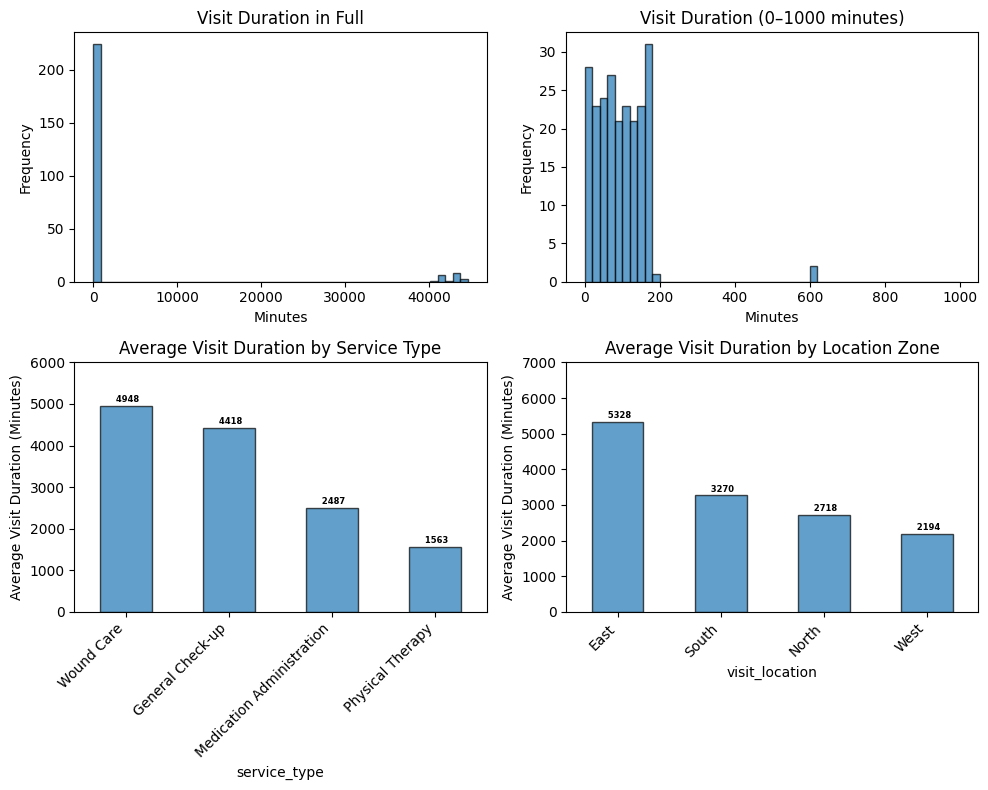

/var/folders/13/pjhlpcmd7p39wth50zd271bh0000gp/T/ipykernel_9817/2567057821.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)
/var/folders/13/pjhlpcmd7p39wth50zd271bh0000gp/T/ipykernel_9817/2567057821.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


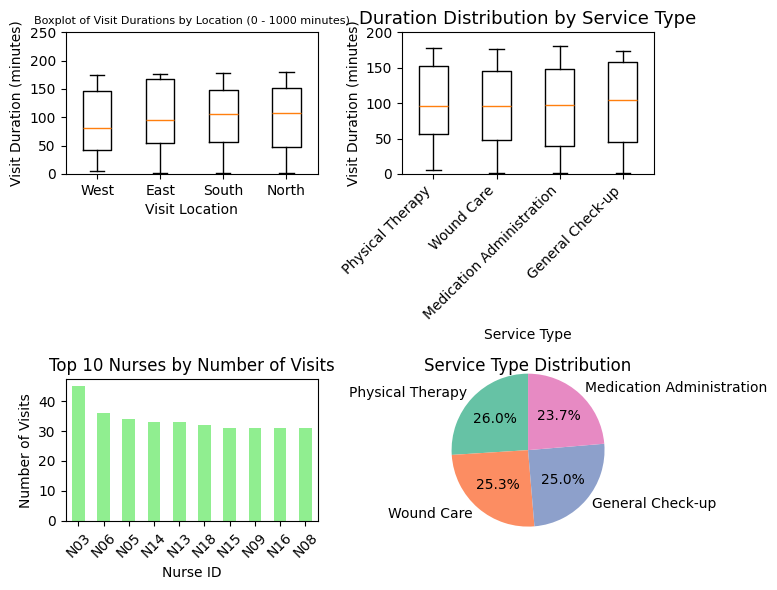

"\nplt.subplot(2, 3, 4)\ndf['visit_hour'] = df['visit_start_time'].dt.hour\nhourly_duration  =df.groupby('visit_hour')['visit_duration_minutes'].mean()\nhourly_duration.plot(kind='line', marker='o', color='purple')\nplt.xlabel('Hour of Day')\nplt.ylabel('Average Duration (minutes)')\nplt.title('Average Duration by Hour of Day')\nplt.xticks(range(0,24))\n"

In [8]:
# 2.4.1
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.hist(df['visit_duration_minutes'].dropna(), bins=50, edgecolor='black', alpha = 0.7)
plt.title("Visit Duration in Full")
plt.xlabel("Minutes")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
plt.hist(df['visit_duration_minutes'].dropna(), bins=50, edgecolor='black', range=(0,1000), alpha = 0.7)
plt.title("Visit Duration (0–1000 minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")

# 2.4.2
plt.subplot(2, 2, 3)
service_avg_sorted = df.groupby('service_type')['visit_duration_minutes'].mean().sort_values(ascending=False)
service_avg_sorted.plot(kind = 'bar', figsize = (10,8), edgecolor = 'black', alpha = 0.7)
plt.ylim(0,6000)
plt.ylabel("Average Visit Duration (Minutes)")
plt.title("Average Visit Duration by Service Type")
plt.xticks(rotation = 45, ha = 'right')
for i, v in enumerate(service_avg_sorted):
    plt.text(i, v + 50, f"{v: .0f}", ha = 'center', va = 'bottom', fontsize = 6, fontweight = 'bold')

# 2.4.2
plt.subplot(2, 2, 4)
visit_location_sorted = df.groupby('visit_location')['visit_duration_minutes'].mean().sort_values(ascending=False)
visit_location_sorted.plot(kind = 'bar', figsize = (10,8), edgecolor = 'black', alpha = 0.7)
plt.ylim(0,7000)
plt.ylabel("Average Visit Duration (Minutes)")
plt.title("Average Visit Duration by Location Zone")
plt.xticks(rotation = 45, ha = 'right')
for i, v in enumerate(visit_location_sorted):
    plt.text(i, v + 50, f"{v: .0f}", ha = 'center', va = 'bottom', fontsize = 6, fontweight = 'bold')

plt.tight_layout()
plt.show()


# 2.4.3
plt.figure(figsize=(18, 10))

# Boxplot by location
plt.subplot(2, 2, 1)
groups = [g['visit_duration_minutes'].dropna() for _, g in df.groupby('visit_location')]
labels = df['visit_location'].unique()

plt.boxplot(groups, labels=labels, showfliers=False)
plt.ylim(0,250)
plt.ylabel("Visit Duration (minutes)")
plt.xlabel("Visit Location")
plt.title("Boxplot of Visit Durations by Location (0 - 1000 minutes)", fontsize = 8)

# Boxplot by service type
plt.subplot(2, 2, 2)
groups = [g['visit_duration_minutes'].dropna() for _, g in df.groupby('service_type')]
labels = df['service_type'].unique()

plt.boxplot(groups, labels=labels, showfliers=False)
plt.ylim(0,200)
plt.xlabel('Service Type')
plt.ylabel('Visit Duration (minutes)')
plt.title('Duration Distribution by Service Type', fontsize = 13)
plt.xticks(rotation=45, ha='right')

# Top 10 nurses
plt.subplot(2, 2, 3)
top_nurses = df['nurse_id'].value_counts().head(10)
top_nurses.plot(kind='bar', color='lightgreen', figsize=(8,6))
plt.title('Top 10 Nurses by Number of Visits')
plt.xlabel('Nurse ID')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)

# Service type duration in pie chart
plt.subplot(2, 2, 4)
df['service_type'].value_counts().plot(
    kind="pie",
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set2.colors,
    radius=1.35
)
plt.title('Service Type Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()


# Hourly duration trend
'''
plt.subplot(2, 3, 4)
df['visit_hour'] = df['visit_start_time'].dt.hour
hourly_duration  =df.groupby('visit_hour')['visit_duration_minutes'].mean()
hourly_duration.plot(kind='line', marker='o', color='purple')
plt.xlabel('Hour of Day')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Duration by Hour of Day')
plt.xticks(range(0,24))
'''